# Álgebra Linear Básica

Este material complementa os slides apresentados no video.

Neste notebook vamos exercitar alguns conceitos de álgebra linear utilizando o numpy e plotando com o matplotlib.

Os objetivo são:

- Familiarização com os conceitos de vetor
- Criar uma intuição sobre transformações lineares
- Entender onde operações matriciais podem entrar em ciência de dados.

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vetor" data-toc-modified-id="Vetor-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vetor</a></span></li><li><span><a href="#Soma-de-vetores" data-toc-modified-id="Soma-de-vetores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Soma de vetores</a></span></li><li><span><a href="#Multiplicação-de-vetor-por-escalar" data-toc-modified-id="Multiplicação-de-vetor-por-escalar-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multiplicação de vetor por escalar</a></span></li><li><span><a href="#Transformações-lineares" data-toc-modified-id="Transformações-lineares-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Transformações lineares</a></span><ul class="toc-item"><li><span><a href="#Dados-originais" data-toc-modified-id="Dados-originais-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dados originais</a></span></li><li><span><a href="#Média-e-evolução" data-toc-modified-id="Média-e-evolução-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Média e evolução</a></span></li><li><span><a href="#Transformações-lineares" data-toc-modified-id="Transformações-lineares-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Transformações lineares</a></span></li><li><span><a href="#Segunda-visualização" data-toc-modified-id="Segunda-visualização-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Segunda visualização</a></span></li></ul></li><li><span><a href="#Referências" data-toc-modified-id="Referências-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Referências</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Vetor

Um vetor em álgebra linear é uma coleção de números ordenada, que possui uma representação gráfica interessante no plano cartesiano, por uma seta cuja origem está normalmente no (0,0), e a extremidade nas coordenadas (x, y). Vetores podem ter mais de 2 dimensões, mas vamos discutir principalmente vetores com 2 dimensões, pois possuem um visual intuitivo interessante que pode ser extrapolado para 3, 4 ou mais dimensões.

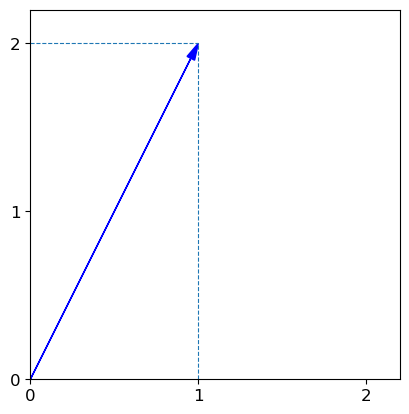

In [2]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 2.2
ymin = 0
ymax = 2.2

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))


lista_xticks = list(range(int(xmin), int(xmax)+1))
ticks = ax.set_xticks(lista_xticks)
labels = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticks = ax.set_yticks(lista_yticks)
labels = ax.set_yticklabels(lista_yticks, fontsize='large')

pt1 = [1,2]

# ax.plot([1],[2],'ro')
ax.arrow(0, 0, pt1[0], pt1[1]
         , head_width=0.05
         , head_length=0.1
         , fc='b', ec='b', 
         length_includes_head=True)

ax.vlines(pt1[0], ymin, pt1[1], linestyles='--', linewidth=.8)
ax.hlines(pt1[1], xmin, pt1[0], linestyles='--', linewidth=.8)


## Soma de vetores

Há duas formas de entender a soma de vetores:

- uma puramente algébrica, em que o resultado é um vetor com as mesmas dimensões dos vetores que foram somados, e as novas dimensões são a soma das respectivas coordenadas
- A outra é gráfica, em que colocamos o começo de um vetor na extremidade do outro, e desenhamos um novo vetor do começo do primeiro até a extremidade do último.

Vamos fazer um gráfico no Python ilustrando o conceito visual.

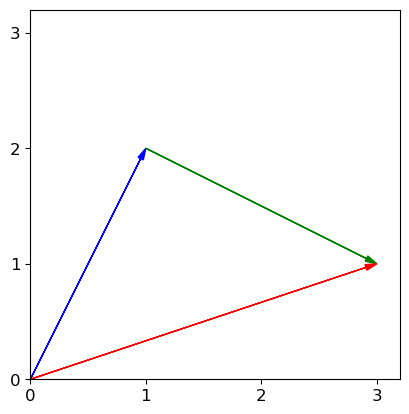

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 3.2
ymin = 0
ymax = 3.2

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

pt1 = [1,2]

# ax.plot([1],[2],'ro')
ax.arrow(0, 0, pt1[0], pt1[1]
         , head_width=0.05
         , head_length=0.1
         , fc='b', ec='b', 
         length_includes_head=True)

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticks = ax.set_xticks(lista_xticks)
labels = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticks = ax.set_yticks(lista_yticks)
labels = ax.set_yticklabels(lista_yticks, fontsize='large')

# ax.vlines(pt1[0], ymin, pt1[1], linestyles='--', linewidth=.8)
# ax.hlines(pt1[1], xmin, pt1[0], linestyles='--', linewidth=.8)

pt2 = [2, -1]

ax.arrow(pt1[0], pt1[1], pt2[0], pt2[1]
         , head_width=0.05
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0,0, pt1[0]+pt2[0], pt1[1]+pt2[1]
         , head_width=0.05
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)

## Multiplicação de vetor por escalar

Um **escalar** é o nome dado em álgebra linear a um "número solto". Esse nome é escolhido pois esse número faz um alteração de escala em um vetor quando são multiplicados.

É uma operação bastante importante, pois uma forma de se enxergar um vetor é através da soma vetorial dos dois vetores da base (\[1, 0\] e \[0, 1\] como a base mais comum) "escalonados" pelas respectivas coordenadas.

array([2, 4])

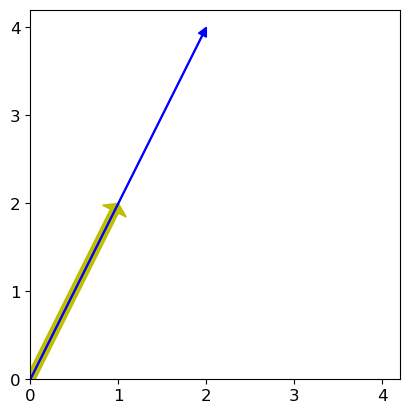

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xmin = 0
xmax = 4.2
ymin = 0
ymax = 4.2

ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticks = ax.set_xticks(lista_xticks)
labels = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticks = ax.set_yticks(lista_yticks)
labels = ax.set_yticklabels(lista_yticks, fontsize='large')

a = 2
v1 = np.array([1,2])
v2 = a*v1

# ax.plot([1],[2],'ro')
ax.arrow(0, 0, v1[0], v1[1]
         , width=0.1
         , head_length=0.1
         , fc='y', ec='y', 
         length_includes_head=True)

ax.arrow(0, 0, v2[0], v2[1]
         , head_width=0.1
         , head_length=0.1
         , width=.01
         , fc='b', ec='b', 
         length_includes_head=True)
v2

## Transformações lineares

Abaixo trabalharemos com um exemplo simulado que consiste nos dados 10 alunos referentes a 2 provas, ```p1```e ```p2```.

Vamos exercitar essas 3 atividades:
- Visualizar os dados originais no plano cartesiano
- Visualizar os mesmos dados através da média e diferença
- Entender que a nova visualização é uma transformação linear da original
- Refletir sobre duas visualizações dessa transformada

### Dados originais

Aqui vamos simular os dados originais, de 10 alunos, correspondentes a duas provas: ```p1``` e ```p2```.

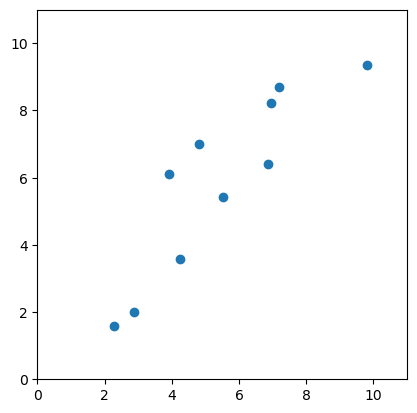

In [5]:
# Definindo e configurando figura e sistemas de eixos
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', 'box')
ax.set(xlim=(0, 11), ylim=(0, 11))

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(10) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,10)
p2[p2>10] = 10
p2[p2<0] = 0
p2

# Gerando o dataframe
df = pd.DataFrame({'p1': p1, 'p2': p2})
#Plotando
plt.scatter(x = df.p1, y=df.p2);

### Média e evolução

Agora vamos calcular média e evolução desses dados como:
- média = (p1+p2)/2
- evolçução = p2-p1

In [6]:
# Calculando média e evolução
df['média'] = df.mean(axis=1)
df['evolução'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,evolução
0,"7,0","8,2","7,6","1,3"
1,"2,9","2,0","2,4","-0,9"
2,"2,3","1,6","1,9","-0,7"
3,"5,5","5,4","5,5","-0,1"
4,"7,2","8,7","7,9","1,5"
5,"4,2","3,6","3,9","-0,6"
6,"9,8","9,4","9,6","-0,4"
7,"6,8","6,4","6,6","-0,4"
8,"4,8","7,0","5,9","2,2"
9,"3,9","6,1","5,0","2,2"


### Transformações lineares

Vamos 'brincar' com transformações lineares desses dados via multiplicação matricial. Ao "brincar" com os dados e testar diversas transformações, o objetivo aqui é entender a representação dos dados por ```média``` e ```evolução``` como transformações lineares dos dados originais.

Além disso, podemos brincar com matrizes diferentes e entender o que elas fazem com os dados.

Esse primeiro gráfico plota também os vetores da visualização 1:

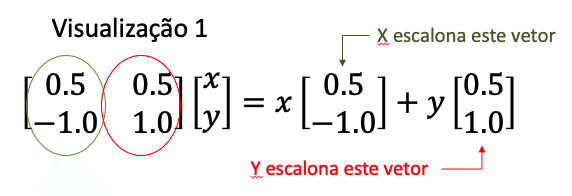

Vamos usar esta construção para fazer a transformação linear de todos os pontos do dataframe:

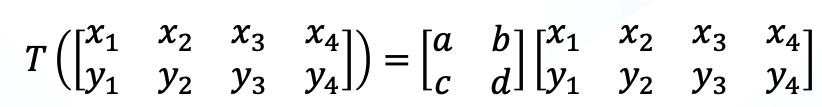

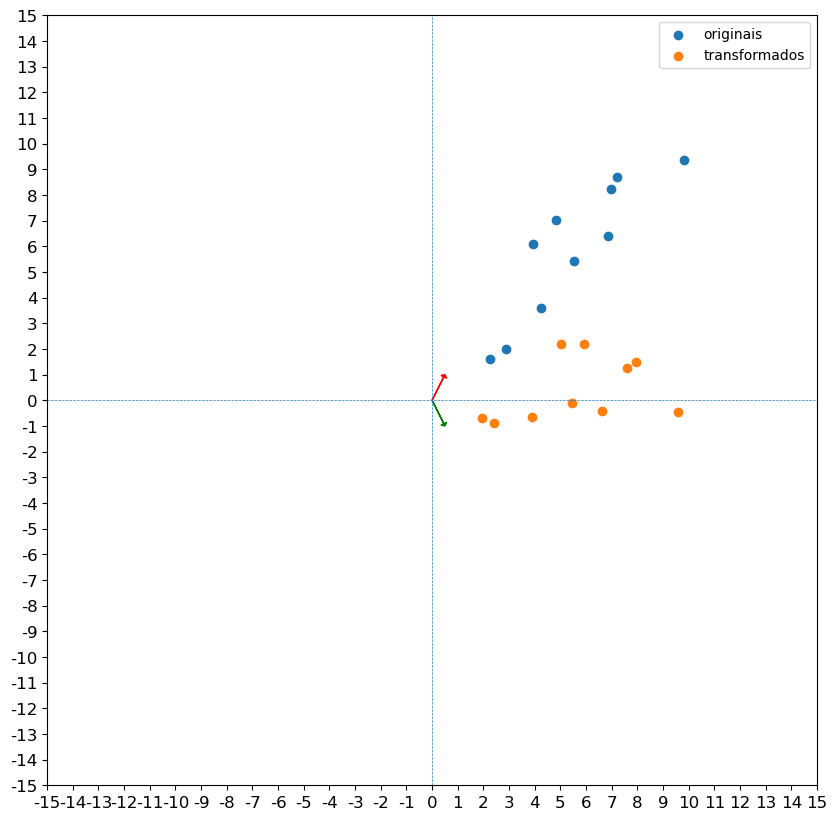

In [7]:
#Definindo figura e configurando eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -15
xmax = 15
ymin = -15
ymax = 15

# ax.axis('equal')
ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ticksx = ax.set_xticks(lista_xticks)
labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ticksy = ax.set_yticks(lista_yticks)
labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

#Matriz de transformação
m = np.array([[ .5,.5],
              [ -1, 1]])

# Vetores coluna da matriz de transformação
ax.arrow(0, 0, m[0,0], m[1,0]
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1]
         , head_width=0.25
         , head_length=0.1
         , fc='r', ec='r', 
         length_includes_head=True)


#linhas horizontais e verticais de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

#Transformação linear
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

# Plotar os dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plotar os dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados')

#Legenda
plt.legend()


In [8]:
def transf_lin(m):

    #Definindo figura e configurando eixos
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -15
    xmax = 15
    ymin = -15
    ymax = 15

    # ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    # Vetores coluna da matriz de transformação
    ax.arrow(0, 0, m[0,0], m[1,0]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[0,1], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)


    #linhas horizontais e verticais de referência
    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    #Transformação linear
    df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

    # Plotar os dados originais
    plt.scatter(df['p1'], df['p2'], label='originais')

    # Plotar os dados transformados
    plt.scatter(df_rot[0,:], df_rot[1,:], label='rotação')

    #Legenda
    plt.legend(loc='lower right')

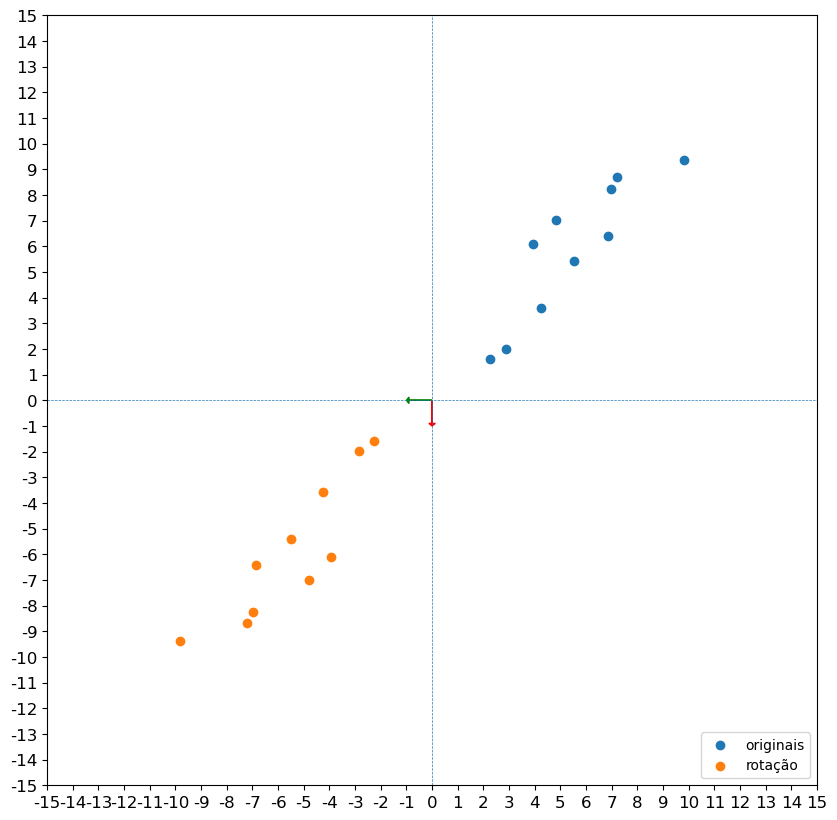

In [9]:
t = np.array([[ -1, 0],
              [ 0, -1]])
transf_lin(t)

### Segunda visualização

Na segunda visualização, temos os vetores nos quais os dados transformados são projetados. Nela enxergamos o que é o "x transformado" e o "y transformado".

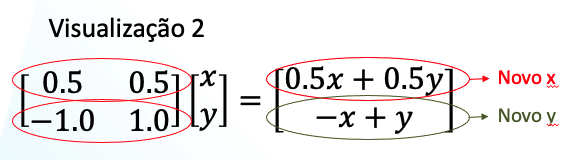

No caso do exemplo, o "x transformado" é a média entre ```p1```, e ```p2```, e o "y transformado" é a diferença.

In [10]:
def translin_v2(m):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(x = df['média'], y=df['evolução'], label = 'transformados')

    ax.legend(loc='upper left')

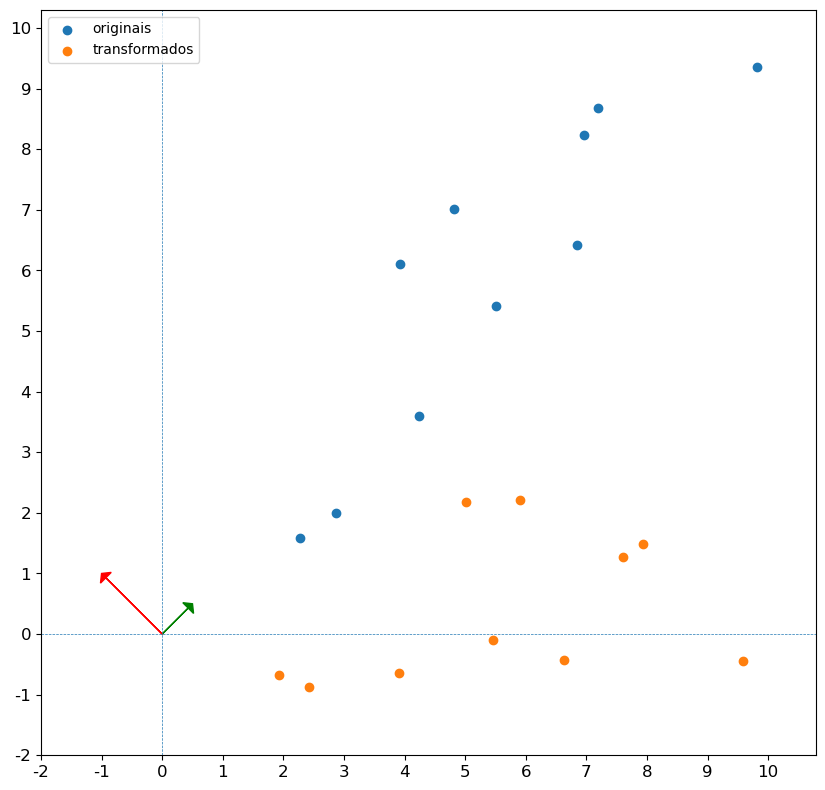

In [11]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t)

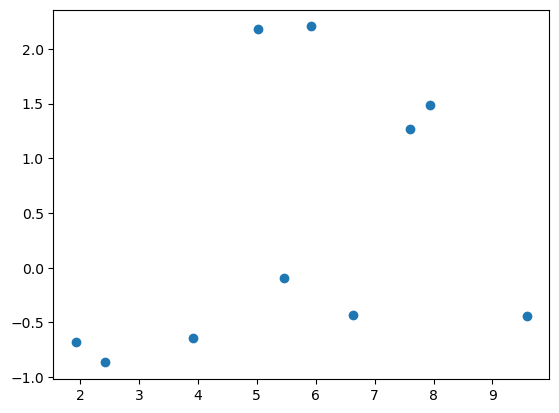

In [12]:
plt.scatter(x = df['média'], y = df['evolução'])

##  Referências

- Playlist sobre álgebra linear do 3blue1brown [aqui](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)
- Livros sobre álgebra linear [aqui](https://math.stackexchange.com/questions/2377980/book-recommendations-for-linear-algebra)